<a href="https://colab.research.google.com/github/RachWatlo/ModelosEstadisticos/blob/main/Experimento_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Leyes de las variables aleatorias**

Vamos a modelar con un experimento aleatorio, la ley (función de densidad) de una v.a. uniforme discreta.

## **Diccionarios**

Un diccionario es un objeto que se crea a partir de algo que se llama "llave" y nos arroja valores:

\{ key: values \}

Es como trabajar una tabla en Excel, donde de preferencia debería de haber la misma cantidad de valores en cada lista que agregues


In [6]:
# Se crea el diccionario d

d={"Raquel":["Masha","Snow"],
      "Nivel":[7,10],
      "Calificaciones":[6.2,8.3]}
d

{'Raquel': ['Masha', 'Snow'], 'Nivel': [7, 10], 'Calificaciones': [6.2, 8.3]}

In [7]:
type(d) # se muestra que d es un diccionario

dict

In [8]:
d.keys() # las llaves del diccionario d

dict_keys(['Raquel', 'Nivel', 'Calificaciones'])

In [9]:
d.values() # valores correspondientes de cada llave

dict_values([['Masha', 'Snow'], [7, 10], [6.2, 8.3]])

In [10]:
# Se está intentando acceder a un elemento específico del diccionario usando índices
# (como si fuera una lista), pero este tipo de objeto no permite indexación directa
d.values()[0]

TypeError: 'dict_values' object is not subscriptable

In [11]:
d.items() # muestra una vista de los elementos del diccionario d

dict_items([('Raquel', ['Masha', 'Snow']), ('Nivel', [7, 10]), ('Calificaciones', [6.2, 8.3])])

## **Ejemplo de la v.a. uniforme**

Sea el experimento aleatorio de lanzar dos dados justos:

* $\Omega = \{1,2,3,4,5,6\} \times \{1,2,3,4,5,6\}$
* $\mathcal{F} = P (\Omega)$
* Para $w=(i,j)$ donde $i,j \in\{1,...,6\}$ tal que

  $$\mathbb{P}(\{\omega\})=\frac{1}{36}$$
  
Vamos a definir a la siguienute variable aleatoria

$$S:\Omega \to R_{S} $$

donde $R_{S}=\{2,3,4,5,6,7,8,9,10,11,12\}$

Para que entendamos la ley de una v.a, basta con entender los siguientes datos

$$\{(k, \mathbb{P}(S=k))\}_{k \in R_{S}}$$


Vamos a entender a S como eventos.

Sea $S_n$ el evento donde la suma de las caras da $n$

$$S_{n} = \{(i,j)\in \Omega \mid i+j=k \}$$


In [12]:
from itertools import product # para usar el producto cartesiano
from fractions import Fraction # para usar la función Fraction

Primero vamos a crear una función de probabilidad global:

In [14]:
def P(A,Omega):
  """
  Calcula la probabilidad de un evento A dentro del espacio muestral Omega.

  Parámetros:
  A (iterable): Subconjunto de Omega, representa el evento.
  Omega (iterable): Espacio muestral, conjunto de todos los posibles resultados.

  Retorno:
  Fraction: Probabilidad del evento A, como una fracción de elementos en A sobre los de Omega.
  """
  P=Fraction(len(A),len(Omega))
  return P

In [15]:
# Crea un conjunto de pares (i, j) representando los resultados de lanzar dos
# dados, donde la suma de los valores es igual a 2.

S_2={(i,j) for i in range (1,7) for j in range(1,7) if i+j==2}

# S_2: Conjunto de tuplas donde la suma de los valores de i y j es exactamente 2.
S_2

{(1, 1)}

Ahora, realizar esto para cada valor de $n$ quita tiempo. Vamos a hacer esto más rápido utilizando diccionarios

In [16]:
# Primero vamos a crear a nuestro espacio muestral Omega
# Crea una lista L con los números del 1 al 6, representando los posibles
# resultados de un dado.
L=[i for i in range (1,7)]

# Crea el espacio muestral Omega como un conjunto de todos los pares posibles (i, j),
# donde i y j son los resultados de lanzar dos dados.
# 'product(L, repeat=2)' genera el producto cartesiano de L consigo misma, es
# decir, todas las combinaciones posibles de dos números de 1 a 6.
Omega= set(product(L,repeat=2))
Omega

{(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6)}

In [17]:
# S: Diccionario que asocia cada par (i, j) con la suma de sus elementos.
S={(i,j):i+j for i,j in Omega}
S

{(3, 4): 7,
 (4, 3): 7,
 (3, 1): 4,
 (5, 4): 9,
 (4, 6): 10,
 (5, 1): 6,
 (2, 2): 4,
 (1, 6): 7,
 (2, 5): 7,
 (1, 3): 4,
 (6, 2): 8,
 (6, 5): 11,
 (4, 2): 6,
 (4, 5): 9,
 (3, 3): 6,
 (5, 6): 11,
 (3, 6): 9,
 (5, 3): 8,
 (2, 4): 6,
 (1, 2): 3,
 (2, 1): 3,
 (1, 5): 6,
 (6, 1): 7,
 (6, 4): 10,
 (3, 2): 5,
 (4, 1): 5,
 (3, 5): 8,
 (5, 2): 7,
 (4, 4): 8,
 (5, 5): 10,
 (1, 1): 2,
 (1, 4): 5,
 (2, 3): 5,
 (2, 6): 8,
 (6, 6): 12,
 (6, 3): 9}

In [18]:
# Crea un diccionario por defecto llamado dS, donde cada clave se asocia
# automáticamente con un conjunto vacío si no existe previamente.
from collections import defaultdict
dS=defaultdict(set)
dS

defaultdict(set, {})

Vamos a añadir elementos a un diccionario que está vacío

In [19]:
for (i,j) in S.items():
  print(j)
#Si imprimo j, me da los valores del diccionario
#Si imprimo i, me da los elementos de la izquierda (llaves)

7
7
4
9
10
6
4
7
7
4
8
11
6
9
6
11
9
8
6
3
3
6
7
10
5
5
8
7
8
10
2
5
5
8
12
9


In [20]:
# Este bucle itera sobre los elementos del diccionario S Para cada j (la suma),
# se añade la tupla i (el par de dados) al conjunto asociado a esa suma en el
# diccionario dS

for i,j in S.items():
  dS[j].add(i)

dS

defaultdict(set,
            {7: {(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)},
             4: {(1, 3), (2, 2), (3, 1)},
             9: {(3, 6), (4, 5), (5, 4), (6, 3)},
             10: {(4, 6), (5, 5), (6, 4)},
             6: {(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)},
             8: {(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)},
             11: {(5, 6), (6, 5)},
             3: {(1, 2), (2, 1)},
             5: {(1, 4), (2, 3), (3, 2), (4, 1)},
             2: {(1, 1)},
             12: {(6, 6)}})

In [21]:
# Crea un nuevo diccionario leyS donde: k es la suma de los dados (valor en dS)
# A es el conjunto de pares (i, j) que generan dicha suma
# Para cada k, se calcula la probabilidad de obtener dicha suma usando la
# función P, con el evento A y el espacio muestral Omega

leyS={k: P(A,Omega) for k, A in dS.items()}
leyS

{7: Fraction(1, 6),
 4: Fraction(1, 12),
 9: Fraction(1, 9),
 10: Fraction(1, 12),
 6: Fraction(5, 36),
 8: Fraction(5, 36),
 11: Fraction(1, 18),
 3: Fraction(1, 18),
 5: Fraction(1, 9),
 2: Fraction(1, 36),
 12: Fraction(1, 36)}

## **Introducción a Pandas en Python**

**Pandas** es una biblioteca de Python muy popular para la manipulación y análisis de datos. Proporciona estructuras de datos de alto rendimiento como `Series` y `DataFrame` que hacen que trabajar con datos tabulares y series temporales sea fácil.

1.  Importar Pandas
Para empezar a trabajar con Pandas, lo primero es importarlo:

In [22]:
import pandas as pd # se importa pandas

#### **Series en Pandas**

Una Series es una estructura de datos unidimensional (similar a una lista o un array de NumPy), pero con etiquetas. Aquí tienes un ejemplo:

In [23]:
# Crear una Serie
serie = pd.Series([1, 3, 5, 7, 9], index=['a', 'b', 'c', 'd', 'e'])
print(serie)

a    1
b    3
c    5
d    7
e    9
dtype: int64


In [24]:
# Acceder a un elemento de la Serie
print(serie['c'])

5


Regresando a nuestro ejermplo de la suma de las caras del dado, tenemos:

In [25]:
# # Convierte el diccionario leyS en una serie de pandas,
# donde las claves del diccionario se convierten en el índice de la serie.
leyS=pd.Series(leyS)

# Ordena la columna de las sumas de menor a mayor
leyS=leyS.sort_index()
leyS

,0
2,1/36
3,1/18
4,1/12
5,1/9
6,5/36
7,1/6
8,5/36
9,1/9
10,1/12
11,1/18


# **Ejercicios**


1.   Documenta tu colab
2.   Calcular la ley de las siguientes variables aleatorias.
* La diferencia de las caras es mayor a 1.
    










In [1]:
# Importar librerías necesarias
import matplotlib.pyplot as plt
from fractions import Fraction
from itertools import product
from collections import defaultdict
import pandas as pd

# Función para calcular la probabilidad de un evento A en un espacio muestral Omega
def P(A, Omega):
    return Fraction(len(A), len(Omega))

# 1. Crear el espacio muestral Omega
L = [i for i in range(1, 7)]
Omega = set(product(L, repeat=2))

In [12]:
# La diferencia de las caras es mayor a 1
diferencia_mayor_1 = {(i, j) for i, j in Omega if (i - j) > 1}
diferencia_mayor_1

{(3, 1),
 (4, 1),
 (4, 2),
 (5, 1),
 (5, 2),
 (5, 3),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4)}

In [13]:
# Calcula la probabilidad de que la diferencia de las caras sea mayor a 1
P_diferencia_mayor_1 = P(A=diferencia_mayor_1, Omega=Omega)
P_diferencia_mayor_1

Fraction(5, 18)

  * La suma de las caras sea par.

In [8]:
# La suma de las caras sea par
suma_par = {(i, j) for i, j in Omega if (i + j) % 2 == 0}
suma_par

{(1, 1),
 (1, 3),
 (1, 5),
 (2, 2),
 (2, 4),
 (2, 6),
 (3, 1),
 (3, 3),
 (3, 5),
 (4, 2),
 (4, 4),
 (4, 6),
 (5, 1),
 (5, 3),
 (5, 5),
 (6, 2),
 (6, 4),
 (6, 6)}

In [9]:
# Calcula la probabilidad de que la suma de las caras sea par
P_suma_par = P(suma_par, Omega)
P_suma_par

Fraction(1, 2)

3.   Verificar en cada caso, que
$$\sum_{k\in R_{X}}\mathbb{P}(X=k)=1$$



In [14]:
# Para la diferencia mayor a 1:
verificacion_diferencia_mayor_1 = P(diferencia_mayor_1, Omega) + P(Omega - diferencia_mayor_1, Omega)
print("Suma de probabilidades diferencia mayor a 1:", verificacion_diferencia_mayor_1)

# Para la suma par:
verificacion_suma_par = P(suma_par, Omega) + P(Omega - suma_par, Omega)
print("Suma de probabilidades suma par:", verificacion_suma_par)

Suma de probabilidades diferencia mayor a 1: 1
Suma de probabilidades suma par: 1


4.  Grafica la función de distribución de la v.a. $S= \{(i,j)\in \Omega \mid i+j=k \}$


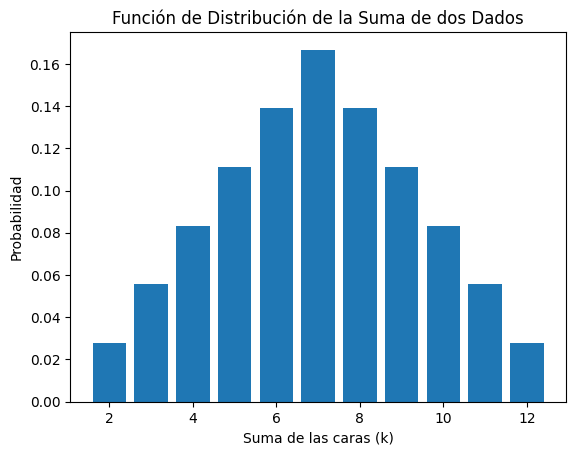

In [15]:
# Crear un diccionario con la suma de los valores de los dados
S = {(i, j): i + j for i, j in Omega}

# Crear un diccionario por default donde cada clave sea la suma y cada valor sea un conjunto de pares (i, j)
dS = defaultdict(set)
for i, j in S.items():
    dS[j].add(i)  # Añadiendo los pares (i, j) al diccionario dS según la suma

# Calcular la ley de probabilidad (frecuencia relativa) para cada valor de la suma
leyS = {k: P(A, Omega) for k, A in dS.items()}

# Convertir leyS a una Serie de pandas y ordenarla por su índice (la suma)
leyS = pd.Series(leyS)
leyS = leyS.sort_index()

# Graficar la función de distribución de la variable aleatoria S (suma de dos dados)
plt.bar(leyS.index, leyS.values)
plt.title('Función de Distribución de la Suma de dos Dados')
plt.xlabel('Suma de las caras (k)')
plt.ylabel('Probabilidad')
plt.show()

5.   Sube tu notebook a GitHub.